## 1. Clustering with the Iris Dataset

### *Using this lesson as a guide, perform clustering on the iris dataset.  Choose features other than the ones used in the lesson.*

In [1]:
#Common DS Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Stats Libraries
import scipy.stats as stats

#Modeling
from sklearn.cluster import KMeans

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

from itertools import combinations

In [2]:
df_iris = sns.load_dataset('iris')
df_iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [3]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
X = df_iris[['petal_length','petal_width']]

In [5]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

### a) Visualize the results of your clustering.

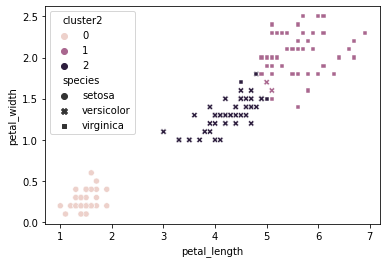

In [6]:
df_iris['cluster2'] = kmeans.predict(X)
sns.scatterplot(data=df_iris, x='petal_length',y='petal_width', hue = 'cluster2',style='species')
plt.show()

### b) Use the elbow method to visually select a good value for k.

Text(0.5, 1.0, 'Change in inertia as k increases')

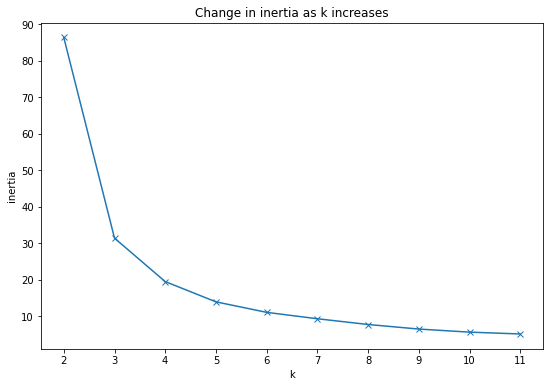

In [7]:
plt.style.context('seaborn-whitegrid')
plt.figure(figsize=(9, 6))
pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases')

### c) Repeat the clustering, this time with 3 different features.

I'm so bad I used all 4!

In [8]:
X4 = df_iris[['sepal_length','sepal_width','petal_length','petal_width']]

In [9]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X4)

kmeans.predict(X4)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

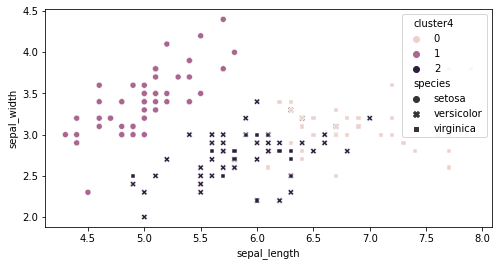

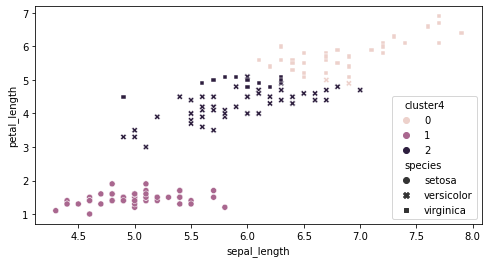

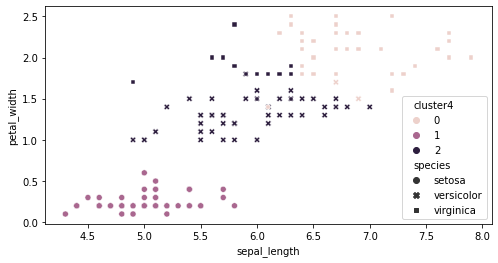

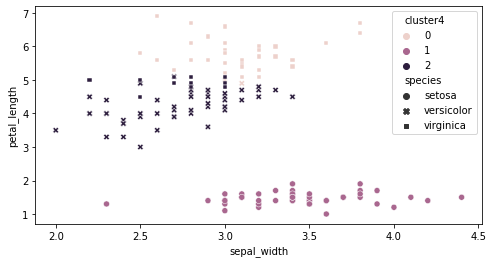

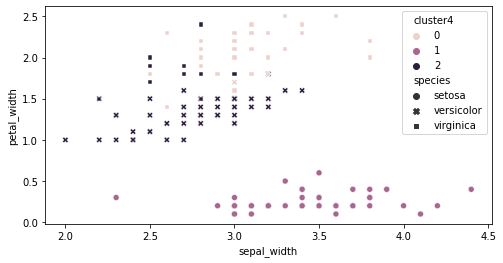

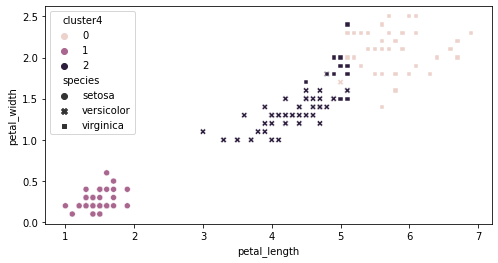

In [10]:
df_iris['cluster4'] = kmeans.predict(X4)
combos = list(combinations(X4.columns,2))

for i in combos:
    plt.figure(figsize = (8,4))
    sns.scatterplot(data=df_iris, x=i[0],y=i[1], hue = 'cluster4', style='species')
    plt.show()

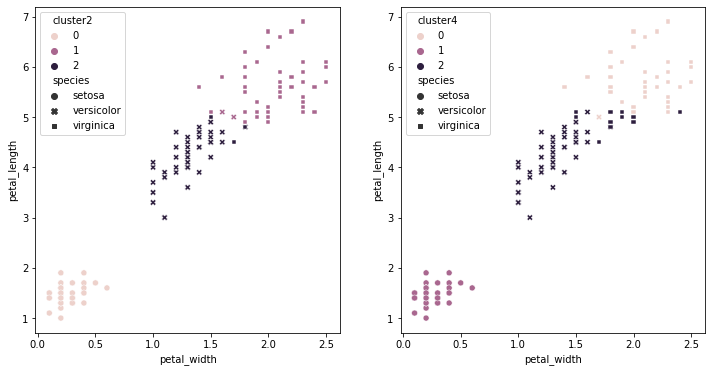

In [11]:
plt.figure(figsize = (12,6))
plt.subplot(121)
sns.scatterplot(data=df_iris, x='petal_width',y='petal_length', hue = 'cluster2', style='species')
plt.subplot(122)
sns.scatterplot(data=df_iris, x='petal_width',y='petal_length', hue = 'cluster4', style='species')
plt.show()

Using less features to determine the cluster (left) makes for better clustering!

## 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [12]:
import acquire

In [13]:
df = acquire.get_mall_data()

In [14]:
Xmall = df[['gender','age','annual_income','spending_score']]
Xmall['is_male'] = np.where(Xmall.gender == 'Male',1,0)
Xmall.drop(columns = 'gender', inplace=True)

In [15]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(Xmall)

kmeans.predict(Xmall)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [16]:
combos = list(combinations(Xmall.columns,2))
combos

[('age', 'annual_income'),
 ('age', 'spending_score'),
 ('age', 'is_male'),
 ('annual_income', 'spending_score'),
 ('annual_income', 'is_male'),
 ('spending_score', 'is_male')]

In [17]:
Xmall['mallcluster'] = kmeans.predict(Xmall)

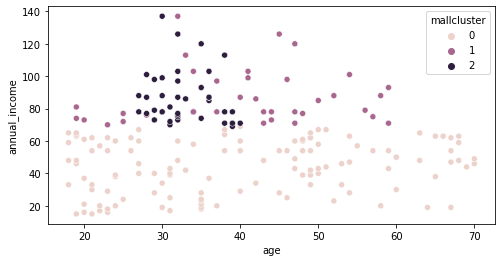

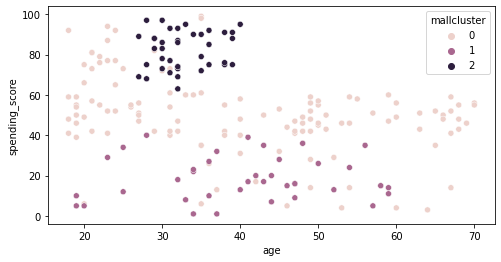

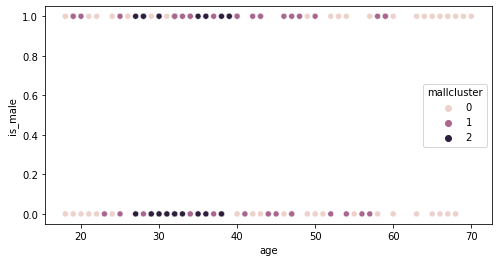

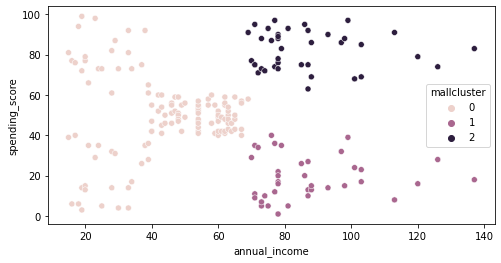

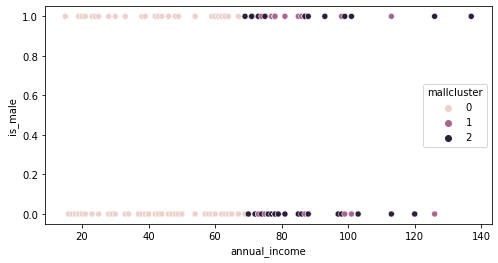

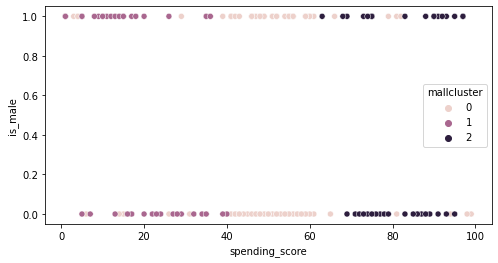

In [18]:
for i in combos:
    plt.figure(figsize = (8,4))
    sns.scatterplot(data=Xmall, x=i[0],y=i[1], hue = 'mallcluster')
    plt.show()

Text(0.5, 1.0, 'Change in inertia as k increases')

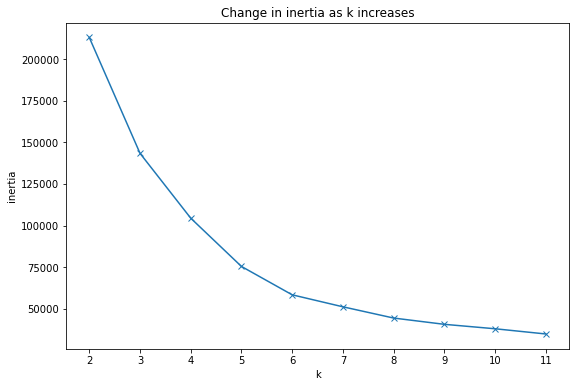

In [19]:
plt.style.context('seaborn-whitegrid')
plt.figure(figsize=(9, 6))
pd.Series({k: KMeans(k).fit(Xmall).inertia_ for k in range(2, 12)}).plot(marker='x')
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases')

## 3. How does scaling impact the results of clustering?

### Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [22]:
import sklearn.preprocessing

In [44]:
mallcluster = Xmall.mallcluster

In [46]:
Xmall = Xmall.drop(columns='mallcluster')

In [47]:
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(Xmall)

MinMaxScaler()

In [54]:
Xmall_scaled = scaler.transform(Xmall)
Xmall_scaled = pd.DataFrame(Xmall_scaled, columns= Xmall.columns.values)
Xmall_scaled['mallcluster'] = mallcluster
Xmall['mallcluster'] = mallcluster
Xmall_scaled

,age,annual_income,spending_score,is_male,mallcluster
0,0.019231,0.000000,0.387755,1.0,0
1,0.057692,0.000000,0.816327,1.0,0
2,0.038462,0.008197,0.051020,0.0,0
3,0.096154,0.008197,0.775510,0.0,0
4,0.250000,0.016393,0.397959,0.0,0
...,...,...,...,...,...
195,0.326923,0.860656,0.795918,0.0,2
196,0.519231,0.909836,0.275510,0.0,1
197,0.269231,0.909836,0.744898,1.0,2
198,0.269231,1.000000,0.173469,1.0,1


In [170]:
Xmall

,age,annual_income,spending_score,is_male,mallcluster
0,19,15,39,1,2
1,21,15,81,1,2
2,20,16,6,0,2
3,23,16,77,0,2
4,31,17,40,0,2
...,...,...,...,...,...
195,35,120,79,0,1
196,45,126,28,0,0
197,32,126,74,1,1
198,32,137,18,1,0


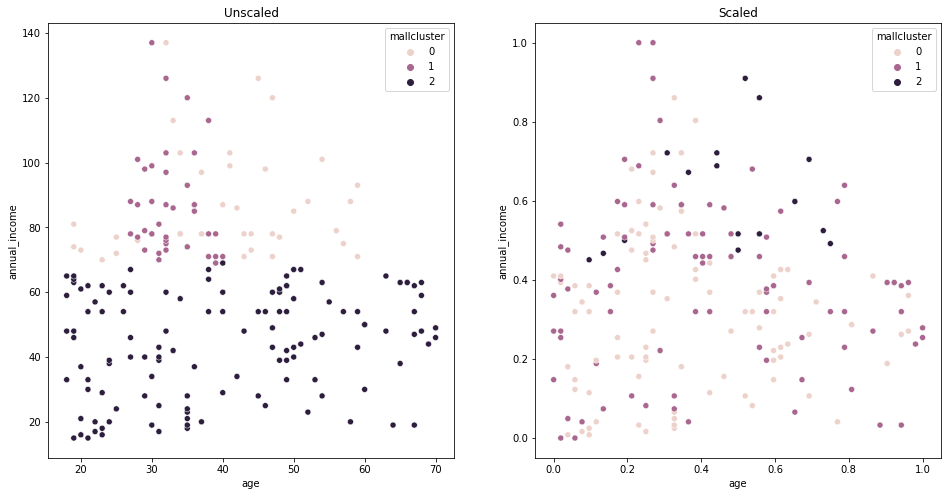

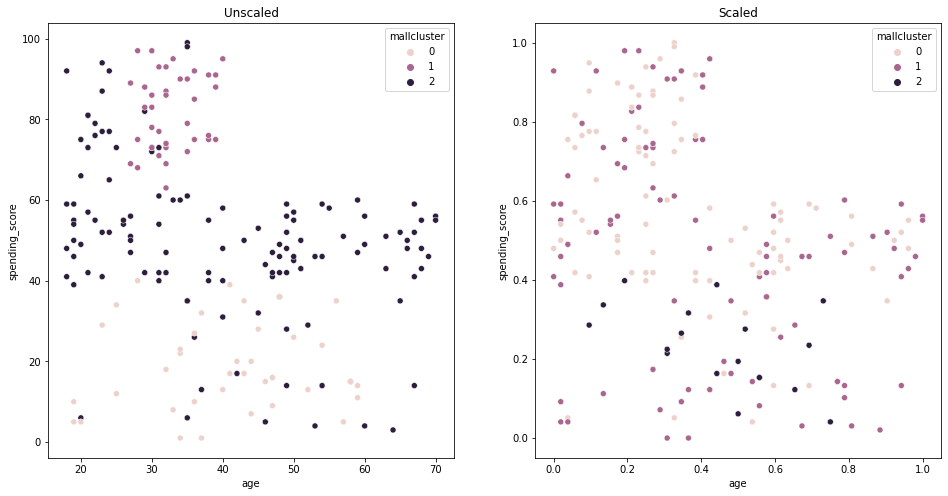

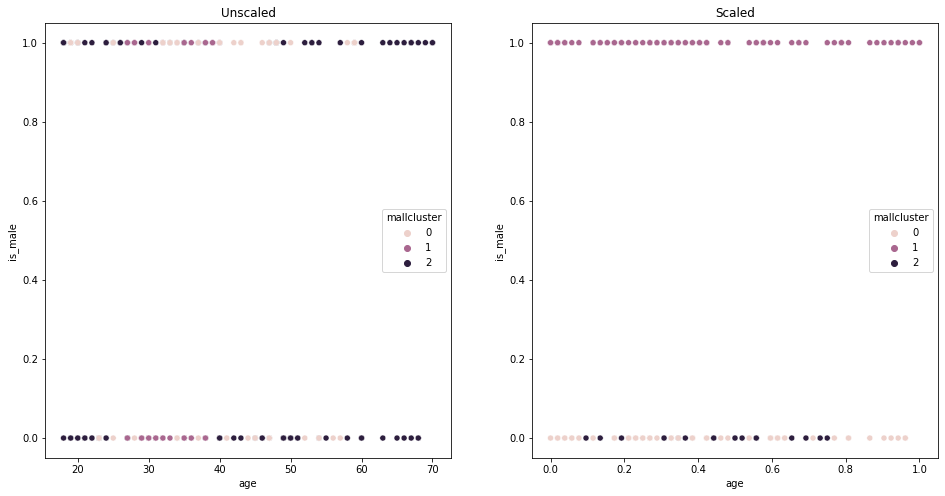

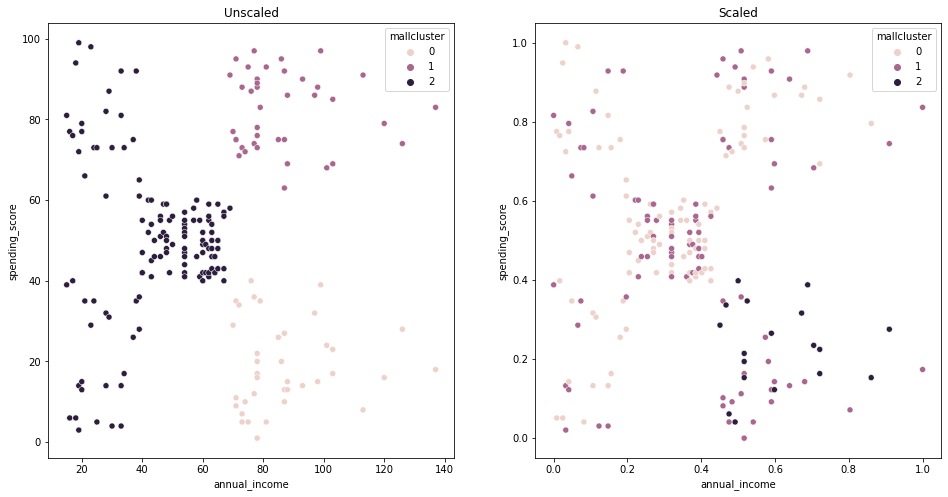

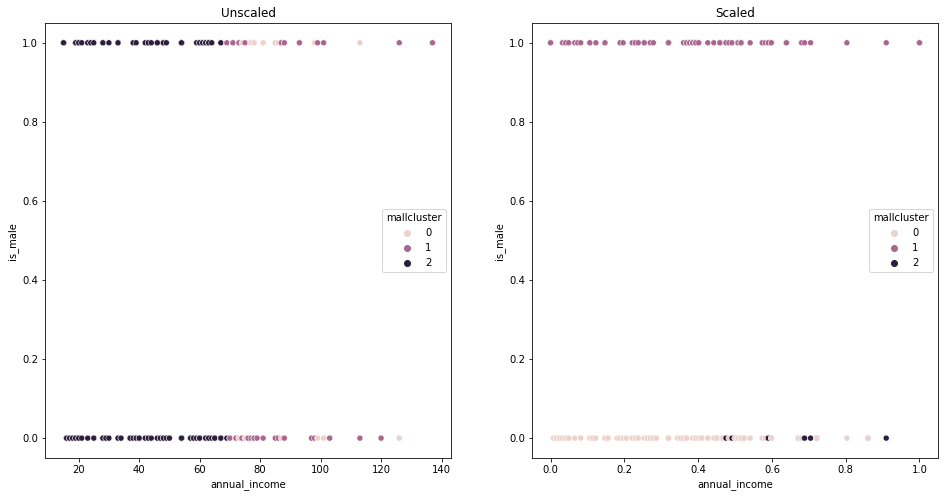

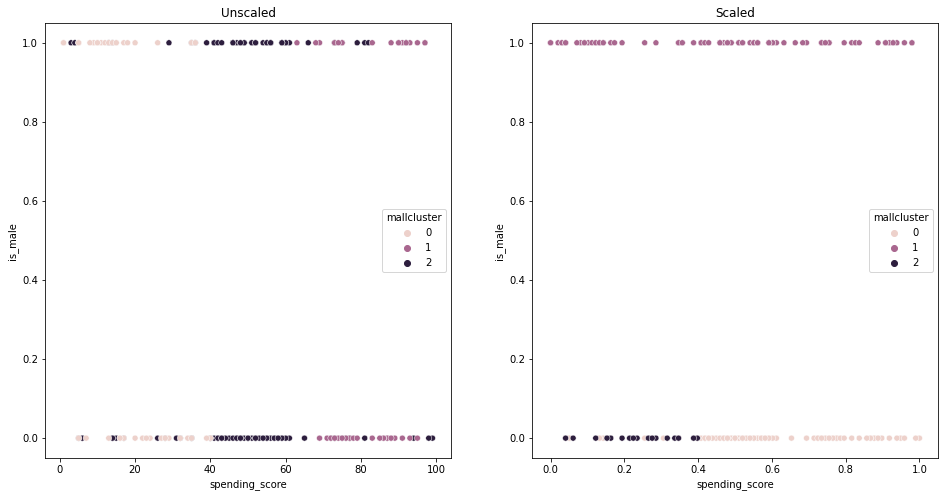

In [60]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(Xmall)
kmeans.predict(Xmall)
Xmall['mallcluster'] = kmeans.predict(Xmall)

kmeans_scaled = KMeans(n_clusters=3)
kmeans_scaled.fit(Xmall_scaled)
kmeans_scaled.predict(Xmall_scaled)
Xmall_scaled['mallcluster'] = kmeans_scaled.predict(Xmall_scaled)

for i in combos:
    plt.figure(figsize = (16,8))
    plt.subplot(121)
    plt.title('Unscaled')
    sns.scatterplot(data=Xmall,x=i[0],y=i[1],  hue = 'mallcluster')
    plt.subplot(122)
    plt.title('Scaled')
    sns.scatterplot(data=Xmall_scaled, x=i[0],y=i[1], hue = 'mallcluster')
    plt.show()

In [73]:
Xmall2 = Xmall.copy()
Xmall2_scaled = Xmall_scaled.copy()

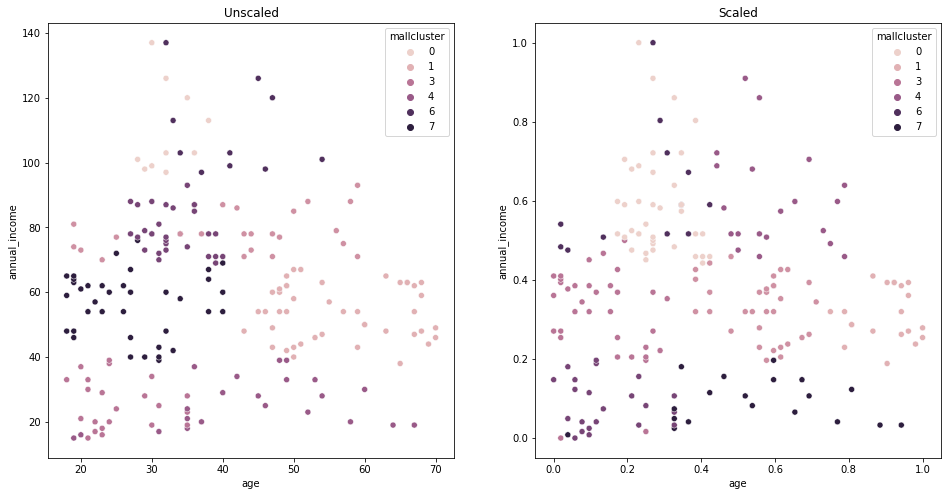

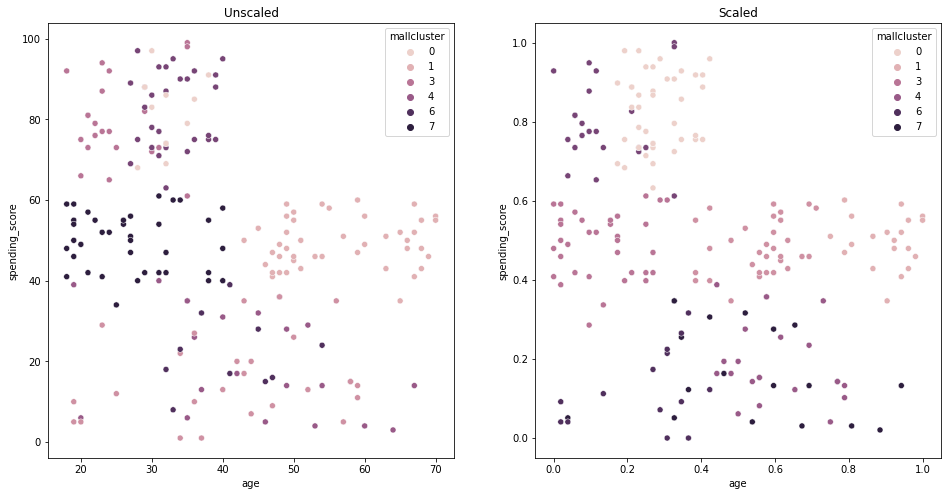

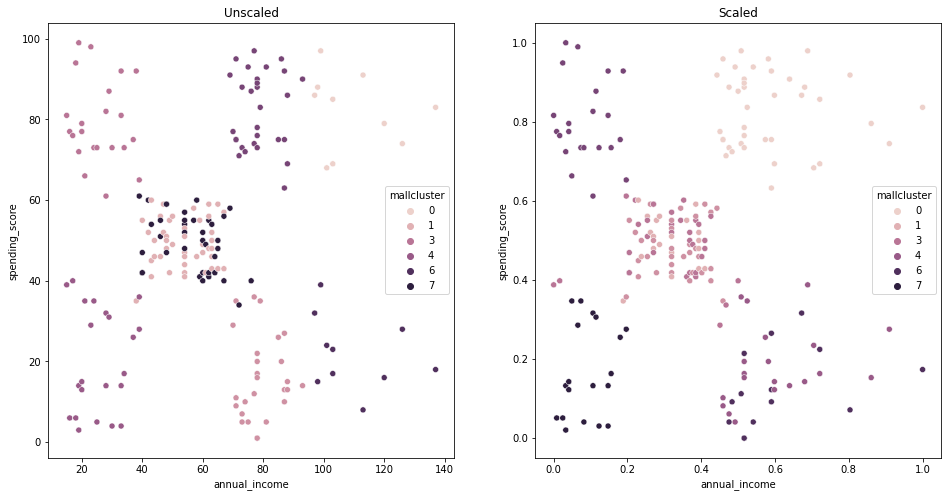

In [74]:
Xmall2.drop(columns = ['is_male','mallcluster'], inplace=True)
Xmall2_scaled.drop(columns = ['is_male','mallcluster'], inplace = True)

combos = list(combinations(Xmall2.columns,2))

kmeans2 = KMeans(n_clusters=8)
kmeans2.fit(Xmall2)
kmeans2.predict(Xmall2)
Xmall2['mallcluster'] = kmeans2.predict(Xmall2)

kmeans_scaled2 = KMeans(n_clusters=8)
kmeans_scaled2.fit(Xmall2_scaled)
kmeans_scaled2.predict(Xmall2_scaled)
Xmall2_scaled['mallcluster'] = kmeans_scaled2.predict(Xmall2_scaled)

for i in combos:
    plt.figure(figsize = (16,8))
    plt.subplot(121)
    plt.title('Unscaled')
    sns.scatterplot(data=Xmall2,x=i[0],y=i[1],  hue = 'mallcluster')
    plt.subplot(122)
    plt.title('Scaled')
    sns.scatterplot(data=Xmall2_scaled, x=i[0],y=i[1], hue = 'mallcluster')
    plt.show()

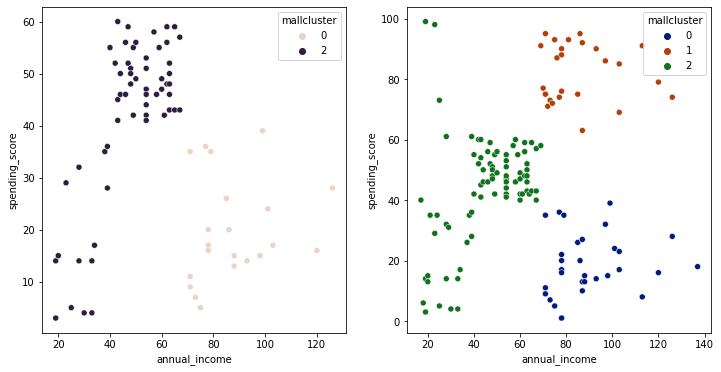

In [108]:
plt.figure(figsize = (12,6))
plt.subplot(121)
sns.scatterplot(data = Xmall[Xmall['age'] > 40], x="annual_income", y='spending_score', hue='mallcluster')
plt.subplot(122)
sns.scatterplot(data = Xmall[Xmall['age'] > 30], x="annual_income", y='spending_score', hue='mallcluster', palette = 'dark')
plt.show()

## Bonus

### a) Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing

In [149]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit#gid=0'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_googlesheet = pd.read_csv(csv_export_url)
df_googlesheet.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


### b) Visualize the data and guess the number and shape of the clusters.

In [151]:
df1 = df_googlesheet.copy()

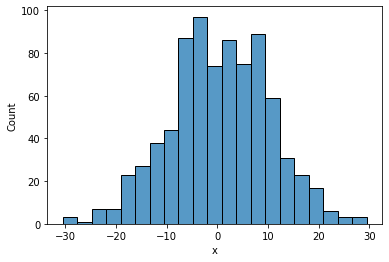

In [152]:
sns.histplot(df1.x)
plt.show()

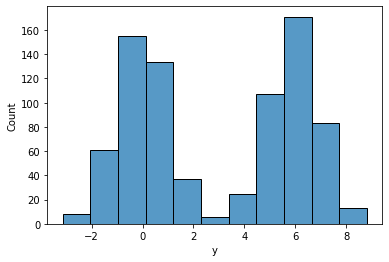

In [153]:
sns.histplot(df1.y)
plt.show()

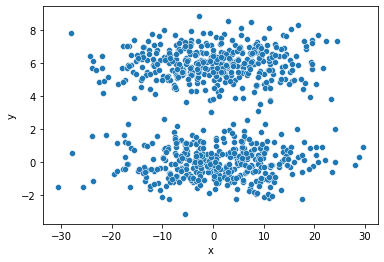

In [154]:
sns.scatterplot(data = df1, x=df1.x, y=df1.y)
plt.show()

It looks like there are two main clusters - above y = 2 and below it.  Makes sense as x is normal and y is bimodal.

### c) Implement the KMeans algorithm on unscaled data and visualize the clusters.

In [155]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df1)

df1['clusters'] = kmeans.predict(df1)

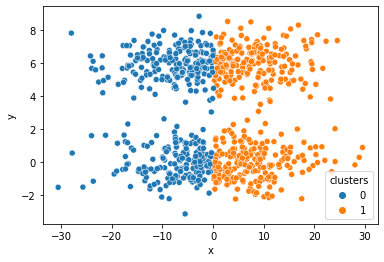

In [156]:
sns.scatterplot(data = df1, x=df1.x, y=df1.y, hue = 'clusters')
plt.show()

In [157]:
df2 = df_googlesheet.copy()

In [158]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df2)

df2['clusters'] = kmeans.predict(df2)

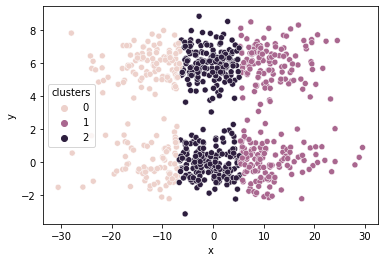

In [159]:
sns.scatterplot(data = df2, x=df2.x, y=df2.y, hue = 'clusters')
plt.show()

### d) Repeat the step above but with scaled data. 

In [160]:
df3 = df_googlesheet.copy()

In [162]:
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(df3)
df3scaled = scaler.transform(df3)
df3scaled = pd.DataFrame(df3scaled, columns= df_googlesheet.columns)
df3scaled.head()

,x,y
0,0.448379,0.273145
1,0.382135,0.414353
2,0.400701,0.268676
3,0.637730,0.311928
4,0.796779,0.291807


In [163]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df3scaled)

df3scaled['clusters'] = kmeans.predict(df3scaled)

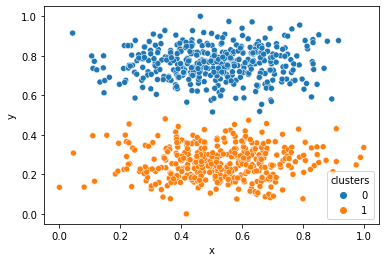

In [164]:
sns.scatterplot(data = df3scaled, x=df3scaled.x, y=df3scaled.y, hue = 'clusters')
plt.show()

In [168]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df3scaled)

df3scaled['clusters'] = kmeans.predict(df3scaled)

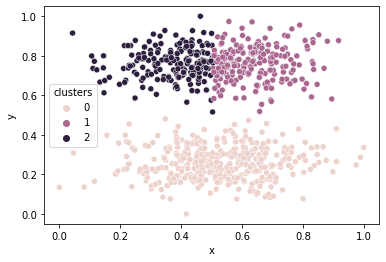

In [169]:
sns.scatterplot(data = df3scaled, x=df3scaled.x, y=df3scaled.y, hue = 'clusters')
plt.show()

### e) Write down the takeaways from this exercise.